(0.0, 400.0)

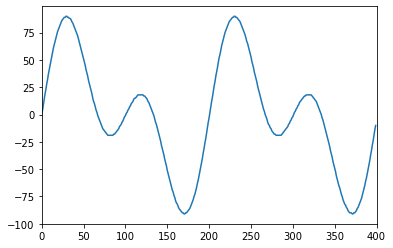

In [11]:
# https://dsp.stackexchange.com/questions/81705/why-mixing-two-sines-sounds-like-a-triangle
# https://github.com/irmen/synthesizer/blob/master/synthplayer/synth.py

import numpy as np
from scipy.signal import blackman
from matplotlib import pyplot as plt

from synthplayer.synth import WaveSynth
from synthplayer.playback import Output

synth_player = WaveSynth()


def sine(*args, **kwargs):
    return synth_player.sine(*args, **kwargs)


def get_sample():
    sine1 = sine(440, 2, amplitude=0.4)
    sine2 = sine(220, 1, amplitude=0.4) 
    sine1.mix(sine2)
    return sine1

# def twos_comp(val, bits):
#     """compute the 2's complement of int value val"""
#     if ((1 << bits - 1) & val) != 0:
#         val = -((((1 << bits) - 1) ^ val) + 1)
#     return val

# def ones_comp(val, bits):
#     """compute the 1's complement of int value val"""
#     return ((1 << bits) - 1) ^ val


# with Output(nchannels=1, mixing="sequential", queue_size=2) as out:
#     out.play_sample(get_sample())
#     out.wait_all_played()


def twos_comp(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val                         # return positive value as is

N = 800

int_values = [twos_comp(x,8) for x in get_sample()._Sample__frames]
plt.plot(int_values[1:N:2])
plt.xlim([0,N/2])

#print(int_values[0:N])
#print(get_sample()._Sample__frames[0:N])


In [12]:
((1 << 8) - 1) ^ 255 + 1

0